In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from ucimlrepo import fetch_ucirepo 

In [20]:
dataset = fetch_ucirepo(id=14) 
X = dataset.data.features 
y = dataset.data.targets 
  
# metadata 
print(dataset.metadata) 
  
# variable information 
print(dataset.variables) 


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [21]:
print(X.head(), y.head())

     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  right   
4  40-49   premeno        0-4       0-2        no          2  right   

  breast-quad irradiat  
0    left_low       no  
1    right_up       no  
2    left_low       no  
3     left_up       no  
4   right_low       no                     Class
0  no-recurrence-events
1  no-recurrence-events
2  no-recurrence-events
3  no-recurrence-events
4  no-recurrence-events


In [ ]:
# Convert target to numeric (M=1, B=0)
y = (y['Class'] == 'M').astype(int)
print(y)

KeyError: 'Class'

In [24]:
# Check for categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Apply Label Encoding safely
X = X.copy()  # Ensure we're working on a copy

label_encoder = LabelEncoder()
for col in categorical_cols:
    X.loc[:, col] = label_encoder.fit_transform(X[col])  # Avoids view/copy issue

Categorical columns: Index([], dtype='object')


In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
print("Class distribution in y_train:\n", y_train.value_counts())


Class distribution in y_train:
 Class
0    228
Name: count, dtype: int64


In [27]:
# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [10]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

In [11]:
# Print model performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



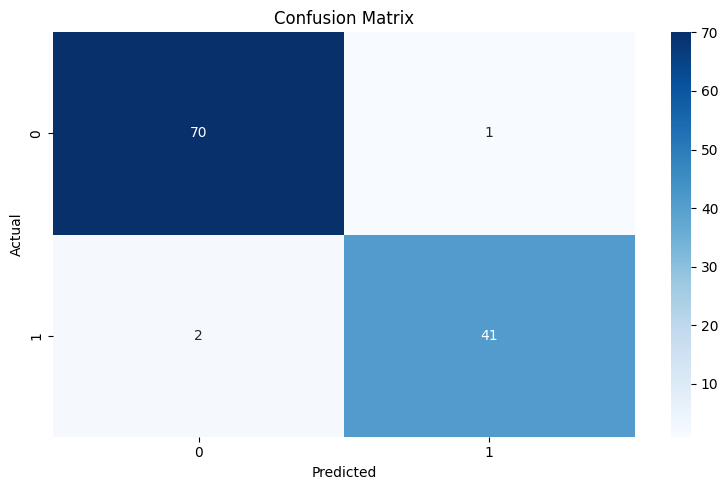

In [12]:
# Create visualizations
plt.figure(figsize=(8, 5))

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



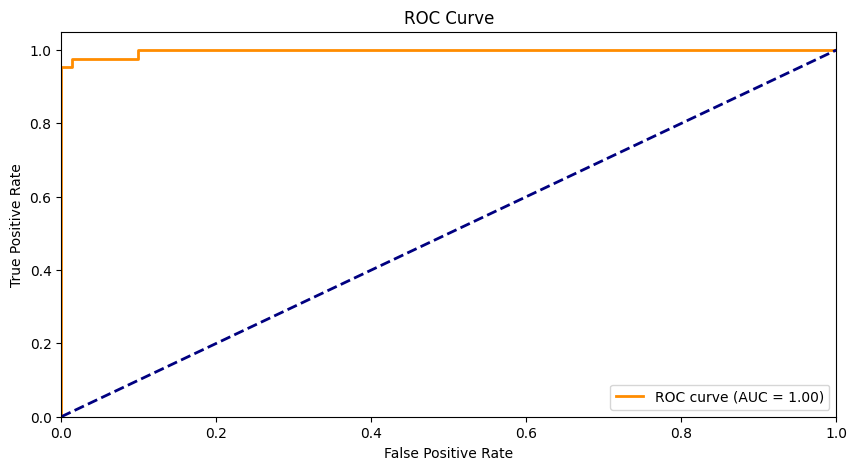

In [13]:
# 2. ROC Curve
# Create visualizations
plt.figure(figsize=(10, 5))

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


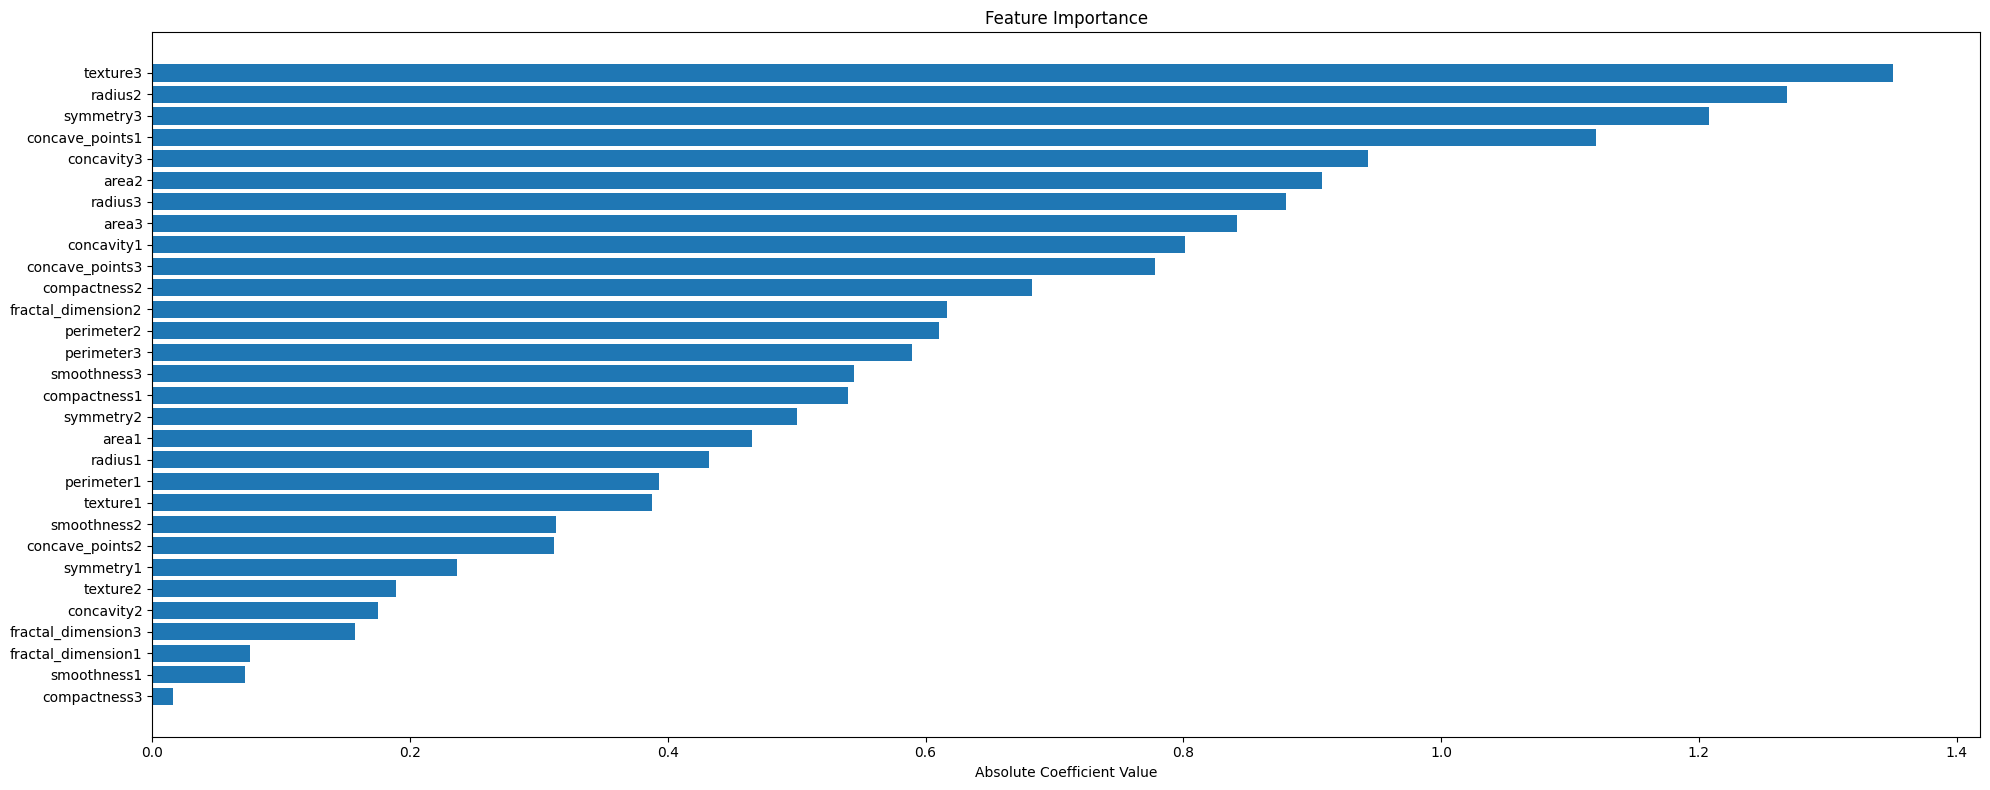

In [14]:
# 3. Feature Importance Plot
# Create visualizations
plt.figure(figsize=(20, 8))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=True)
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')

plt.tight_layout()
plt.show()


In [ ]:
# 4. Decision Boundary Plot
plt.subplot(224)
# Create DataFrame with test data and predictions
example_df = pd.DataFrame()
example_df['radius1'] = X_test['radius1']  # Using radius1 as example feature
example_df['target'] = y_test
example_df['logistic_preds'] = y_pred_prob

# Create scatter plot
malignantFilter = example_df['target'] == 1
benignFilter = example_df['target'] == 0

plt.scatter(example_df.loc[malignantFilter, 'radius1'].values,
           example_df.loc[malignantFilter, 'logistic_preds'].values,
           color='r',
           s=60,
           label='Malignant')

plt.scatter(example_df.loc[benignFilter, 'radius1'].values,
           example_df.loc[benignFilter, 'logistic_preds'].values,
           color='b',
           s=60,
           label='Benign')

plt.axhline(y=0.5, c='y')
plt.axhspan(0.5, 1, alpha=0.05, color='red')
plt.axhspan(0, 0.4999, alpha=0.05, color='blue')
plt.text(min(example_df['radius1']), 0.6, 'Classified as Malignant', fontsize=12)
plt.text(min(example_df['radius1']), 0.4, 'Classified as Benign', fontsize=12)

plt.ylim(0, 1)
plt.legend(loc='lower right', markerscale=1.0, fontsize=10)
plt.xlabel('Radius', fontsize=12)
plt.ylabel('Probability of Malignant', fontsize=12)
plt.title('Logistic Regression Decision Boundary', fontsize=14)

plt.show()

ValueError: Single argument to subplot must be a three-digit integer, not 22

<Figure size 640x480 with 0 Axes>

In [16]:
# Print top 5 most important features
print("\nTop 5 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head())



Top 5 Most Important Features:
            feature  importance
21         texture3    1.350606
10          radius2    1.268178
28        symmetry3    1.208200
7   concave_points1    1.119804
26       concavity3    0.943053
